# _Python for Scientific Data Analysis_


#    Module 1: Matplotlib

## Section 3: Shadings, Histograms, Contour Plots, and Images 
In the previous section, we saw how to customize the manner in which data are presented using subplots and axes configurations.   Now, we will illustrate further data customizations: different types of shadings/fillings, histogram plots, contour plots, and images.  We will discuss other types of plots, including bar plots and violin plots later.   

### Filling and Shading Plot Regions

The chief way to fill in plot areas is _**fill\_between**_ , callable from pylot, which has the following syntax: ``plt.fill_between(x,y1,y2=0,where = None)``.  This will fill in a shaded area along the x-interval (x) between y values y1 and y2.   If y2 is not defined, then it defaults to zero.  The _where_ keyword allows you to selectively identify which horizontal regions are filled.

Below is a simple example of _fill\_between_ in action, shading in regions of a sine wave plot above and below 0 on the y axis:

In [1]:
#preamble stuff
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

from matplotlib import rcParams
rcParams['figure.figsize']=[12,8]

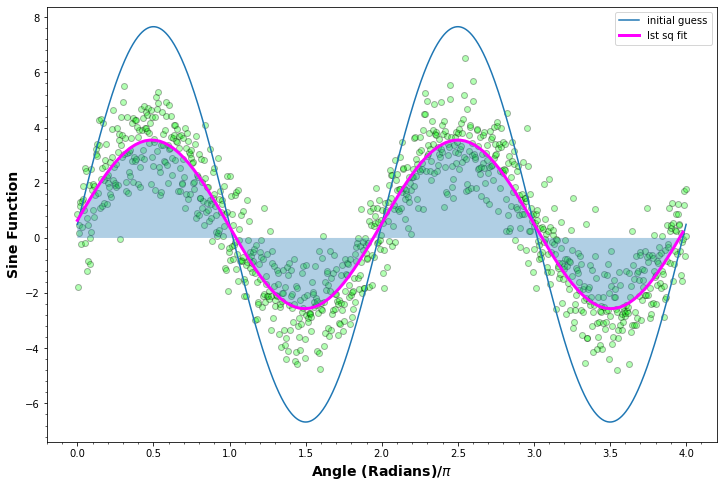

In [3]:
from scipy.optimize import leastsq
from matplotlib.ticker import AutoMinorLocator

#Ex 3.1

N=1000 #number of data points
t=np.linspace(0,4*np.pi,N)
data=3*np.sin(t+0.001)+0.5+np.random.randn(N)
guess_mean=np.mean(data)
guess_std=3*np.std(data)
guess_phase =0
guess_freq=1
guess_amp=1

#purposefully set the initial guess to have an amplitude that is 2x too large
data_first_guess = guess_std*np.sin(t+guess_phase) + guess_mean
optimize_func = lambda x: x[0]*np.sin(x[1]*t+x[2]) + x[3] - data
est_amp, est_freq, est_phase, est_mean = leastsq(optimize_func, [guess_amp, guess_freq, guess_phase, guess_mean])[0]
data_fit = est_amp*np.sin(est_freq*t+est_phase) + est_mean
fine_t = np.arange(0,max(t),0.1)
data_fit=est_amp*np.sin(est_freq*fine_t+est_phase)+est_mean
 #plt.plot(t,data,'.',color='tab:blue',alpha=0.7)

fig,axes=plt.subplots()

tp=t/np.pi
axes.scatter(tp,data,color='lime',alpha=0.3,edgecolor='black')
axes.plot(tp,data_first_guess,label='initial guess')
axes.plot(fine_t/np.pi,data_fit,label='lst sq fit',color='magenta',linewidth=3)
axes.fill_between(fine_t/np.pi,data_fit,alpha=0.35)
axes.set_ylabel('Sine Function',size=14,weight='bold')
axes.set_xlabel('Angle (Radians)/$\pi$',size=14,weight='bold')
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

axes.legend(loc='best')



Shaded regions are often used to identify confidence intervals and other similar statistical quantities.  In the example below, we use _fill\_between_ to plot the `variance of the predicted response'.   Note: this is the correct version of what is shown in the _matplotlib_ documentation on _fill\_between_ (which has the wrong equation!).  


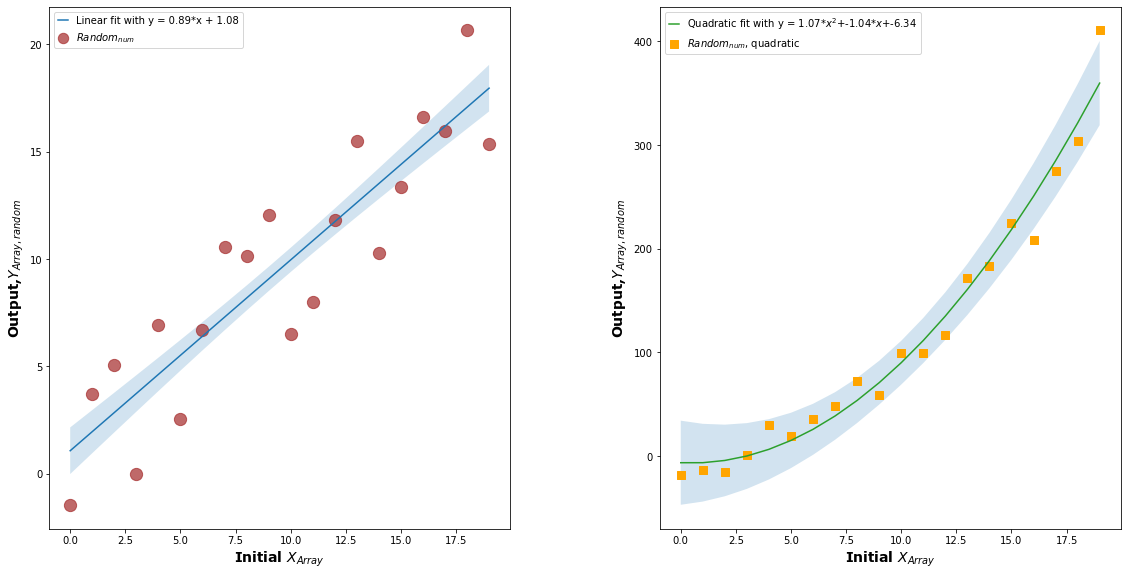

In [9]:
xarray=np.arange(20)   #an array of numbers from 0 to 19
yarray=np.arange(20)+3*np.random.randn(20)
#y is same as x EXCEPT now we vary the value +/- some random number about x

a,b=np.polyfit(xarray,yarray,1)
#a polynomial fit of degree one look up the documentation if you are curious

y_est=xarray*a+b

#'varianceof the predicted response': https://en.wikipedia.org/wiki/Variance_of_the_mean_and_predicted_responses
y_err=(yarray-y_est).std()*np.sqrt(1/len(xarray) + (xarray-xarray.mean())**2/np.sum((xarray-xarray.mean())**2))

yarray2=(np.arange(20))**2.+20*np.random.randn(20)

#polynomial of degree two
a2,b2,c2=np.polyfit(xarray,yarray2,2)

poly=np.poly1d(np.polyfit(xarray,yarray2,2))
#a convenience class to write the polynomial fit

#5times 'variance of the predicted response': https://en.wikipedia.org/wiki/Variance_of_the_mean_and_predicted_responses
y_err2=5*(yarray2-poly(xarray)).std()*np.sqrt(1/len(xarray) + (xarray-xarray.mean())**2/np.sum((xarray-xarray.mean())**2))

sscale=2
fig,axes=plt.subplots(1,2,figsize=(9.6*sscale,4.8*sscale))
#thedefault width is 6.4 inches by 4.8 inches, here increase width by 50%

fig.subplots_adjust(wspace=0.325)
axes[0].plot(xarray,xarray*a+b,label='Linear fit with y = {0:.2f}*x + {1:.2f}'.format(a,b))

axes[0].fill_between(xarray,y_est-y_err,y_est+y_err,alpha=0.2)
axes[0].scatter(xarray,yarray,marker='o',s=150,alpha=0.7,label=r'$Random_{num}$',color='brown')
axes[0].legend(loc='upper left',fontsize='medium',handlelength=1,markerscale=0.85)

axes[1].plot(xarray,poly(xarray),c='tab:green',label=r'Quadratic fit with y = {0:.2f}*$x^2$+{1:.2f}*$x$+{2:.2f}'.format(a2,b2,c2))

axes[1].fill_between(xarray,poly(xarray)-y_err2,poly(xarray)+y_err2,alpha=0.2)

axes[1].scatter(xarray,yarray2,marker='s',c='orange',s=50, label=r'$Random_{num}$, quadratic')
axes[1].legend(loc='upper left',fontsize='medium',handlelength=1)

for i in range(len(axes)):

 axes[i].set_xlabel('Initial $X_{Array}$',font='Verdana',size=14,color='black',weight='bold')
 axes[i].set_ylabel(r'Output,$Y_{Array, random}$',font='Verdana',size=14,color='black',weight='bold')

### Histogram Plots

Switching gears (substantially!) now ... a _**histogram**_ plot represents data provided in the form of some groups. It is an accurate method for the graphical representation of numerical data distribution. It is a type of bar plot where the X-axis represents the bin ranges while the Y-axis gives information about frequency.  A simple call looks like ``plt.hist(data,bins=number-of-bins,density=True/False,weights=weights,stacked=True/False`` or ``axes.hist(data,bins=number-of-bins,density=True/False,weights=weights,stacked=True/False`` using the axes container.  

Key parameters include

- 1) _bins_ - this is simply the number of bins. The default is 10.  Now, you can set a bin width by taking the full range of your data and dividing by some widthsize.  E.g. if x goes from 7 to 10 and you want the bin widths to be 0.1, then you can set ``nbins= (10-7)/0.1`` (i.e. 30 bins).
- 2) _stacked_ - If true, multiple data are stacked on top of each other; otherwise, different data are arranged side-by-side.
- 3) _density_ - If set to true, this will retur na probability density.  each bin will display the bin's raw count divided by the total number of counts and the bin width (density = counts / (sum(counts) * np.diff(bins))), so that the area under the histogram integrates to 1 (np.sum(density * np.diff(bins)) == 1).
- 4) _histype_ - Can be bar, barstacked (data stacked on top of each other), step (line plot that is unfilled), and stepfilled (line plot that is filled).

Note that if you treat _hist_ as a function, it returns a tuple which is the number of points in each bin, the edge of the bins, and patches (container of individual 'artists' used to create the histogram): e.g. ``number,bins,patches=ax.hist(keywords)``.


The full API is here [https://matplotlib.org/stable/api/_as\_gen/matplotlib.pyplot.hist.html]().

Below is an example of a histogram plot of stellar ages drawn from a recent paper (Stanford-Moore and Nielsen 2017):

[None, None, None, None]

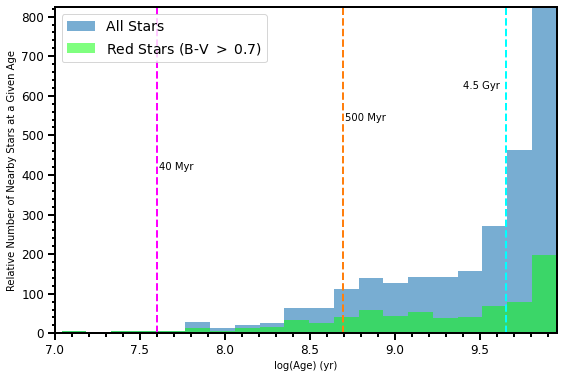

In [23]:
#import numpy as np
import math
import scipy
#import matplotlib.pyplot as plt
#we will get to this later, don't worry about it for now
from astropy.io import ascii

agefile='./code/sect3/files/table2cds.dat'

tab_sm=ascii.read(agefile)

names=tab_sm['ID']
median_age=np.log10(tab_sm['50AgeF']*1e6)

bmvcolor=tab_sm['B-V']

redstars=np.where(bmvcolor > 0.7)

#now make the figure

fig,ax=plt.subplots(1,1,figsize=(9,6))

#noweights needed
#weights=np.ones_like(median_age)/len(median_age)
ax.set_xlabel('log(Age) (yr)')
ax.set_ylabel('Relative Number of Nearby Stars at a Given Age')
ax.set_xlim(7,median_age.max())


#fordensity=True plot
#ax.set_ylim(0,1)

ax.tick_params(which='both',direction='out',width=2,labelsize='large')
ax.tick_params(which='major',length=7)
ax.tick_params(which='minor',length=3.5)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
w=0.125
nbin=math.ceil((9.75-7)/w)
 
#setsthe maximum equal to ~1 in this case for all histogram plot contributions
#ax.hist(median_age,bins=nbin,histtype='stepfilled',density='True',stacked='True',lw=3,alpha=0.6,label='All Stars')
#ax.hist(median_age[redstars],bins=nbin,histtype='stepfilled',density='True',stacked='True',lw=3,alpha=0.25,color='lime',label=r'Red Stars (B-V) $>$ 0.7')
 
#setsthe maximum to the actual maximum value in the bin
#n,bins,patches=ax.hist(median_age,bins=nbin,histtype='stepfilled',stacked='True',lw=3,alpha=0.6,label='All Stars')
 
#returnsa tuple to give you the number in each bin, number of bins, and patches
n,bins,patches=ax.hist(median_age,bins=nbin,histtype='stepfilled',stacked='True',lw=3,alpha=0.6,label='All Stars')


ax.hist(median_age[redstars],bins=nbin,histtype='stepfilled',stacked='True',lw=3,alpha=0.5,color='lime',label=r'Red Stars (B-V $>$ 0.7)')
 
ax.set_ylim(0,n.max())

 
ax.axvline(x=np.log10(5e8),c='C1',linestyle='dashed',linewidth=2)
ax.axvline(x=np.log10(4e7),c='magenta',linestyle='dashed',lw=2)
ax.axvline(x=np.log10(4.5e9),c='cyan',linestyle='dashed',lw=2)
ax.text(np.log10(4.5e9)-.25,0.75*n.max(),'4.5 Gyr')
ax.text(np.log10(5e8)+0.01,0.65*n.max(),'500 Myr')
ax.text(np.log10(4e7)+0.01,0.5*n.max(),'40 Myr')
ax.legend(loc='upper left',fontsize=14)

plt.setp(ax.spines.values(),linewidth=2)

#or
#for axl in ['top','bottom','left','right']:
#   ax.spines[axl].set_linewidth(2)

You can also do 2-D histogram plots using ``plt.hist2d`` (or ``ax.hist2d``), which accepts the _bins_ keyword and also accepts _cmin_ and _cmax_, which are minimum and maximum count values to display (values outside this range will be set to NaN).   Keywords can also adjust the color map and color scale: e.g. ``ax.hist2d(xdata,ydata,bins=10,cmap='Blues',norm=colors.LogNorm(vmin=vmin,vmax=vmax)``.

Below is a hist-2d example with a colorbar added to map between color and number in each bin:

In [24]:
### (Ex_3.4)

#note: I'm writing this as a function now and then executing in the next cell
def ex3_4():
 import matplotlib.pyplot as plt
 import numpy as np
 from matplotlib.ticker import AutoMinorLocator

 x=np.random.normal(size=10000)
 y=x*3 + np.random.normal(size=10000)-1.5*np.random.randn(10000)

 fig,axes=plt.subplots()

 hist_2d=axes.hist2d(x,y,bins=(25,25))

 axes.set_xlabel('X Variable')
 axes.set_ylabel('Y Variable')
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 #adding a color bar
 fig.colorbar(hist_2d[3],ax=axes,label='Counts')
 plt.show()



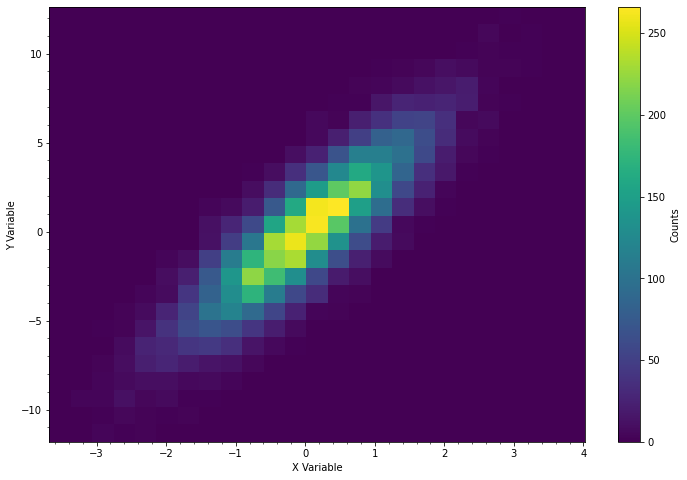

In [25]:
ex3_4()

It takes a bit of configuring, but you can also add horizontal and vertical histograms to a scatter plot or hist-2d plot.  The official documentation lists a couple of ways to do this: arguably the easiest is to not use ``plt.subplots()`` but use ``fig.add_gridspec`` to define a 2 by 2 grid but only fill 3 of the 4 spaces.  

Below is an example from the previous plot:

In [29]:
###(Ex_3.5)

def ex3_5():
    
 import matplotlib.pyplot as plt
 import numpy as np
 from matplotlib.ticker import AutoMinorLocator

 x=np.random.normal(size=10000)
 y=x*3 + np.random.normal(size=10000)-1.5*np.random.randn(10000)

 sscale=2
 fig=plt.figure(figsize=(7*sscale,7*sscale))
 gs=fig.add_gridspec(2,2,width_ratios=(4,1),height_ratios=(1,4),left=0.1,right=0.9,bottom=0.1,top=0.9,wspace=0.05,hspace=0.05)
 axes=fig.add_subplot(gs[1,0])
 ax_histx=fig.add_subplot(gs[0,0],sharex=axes)
 ax_histy=fig.add_subplot(gs[1,1],sharey=axes)

 hist_2d=axes.hist2d(x,y,bins=(25,25))

 axes.set_xlabel('X Variable')
 axes.set_ylabel('Y Variable')
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 axes.tick_params(labeltop=True)

 ax_histx.hist(x,bins=25)
#now, re-set the ticks
 ax_histx.xaxis.set_ticks_position('top')
 ax_histx.xaxis.set_label_position('top')
 ax_histx.xaxis.set_minor_locator(AutoMinorLocator(5))
 ax_histx.yaxis.set_minor_locator(AutoMinorLocator(5))
 ax_histx.set_ylabel('Number')
 ax_histx.set_xlabel('X Variable')


 ax_histy.hist(y,bins=25,orientation='horizontal')
 ax_histy.xaxis.set_ticks_position('top')
 ax_histy.xaxis.set_label_position('top')
 ax_histy.yaxis.set_ticks_position('right')
 ax_histy.yaxis.set_label_position('right')
 ax_histy.xaxis.set_minor_locator(AutoMinorLocator(5))
 ax_histy.yaxis.set_minor_locator(AutoMinorLocator(5))
 ax_histy.set_xlabel('Number')
 ax_histy.set_ylabel('Y Variable',rotation=270)




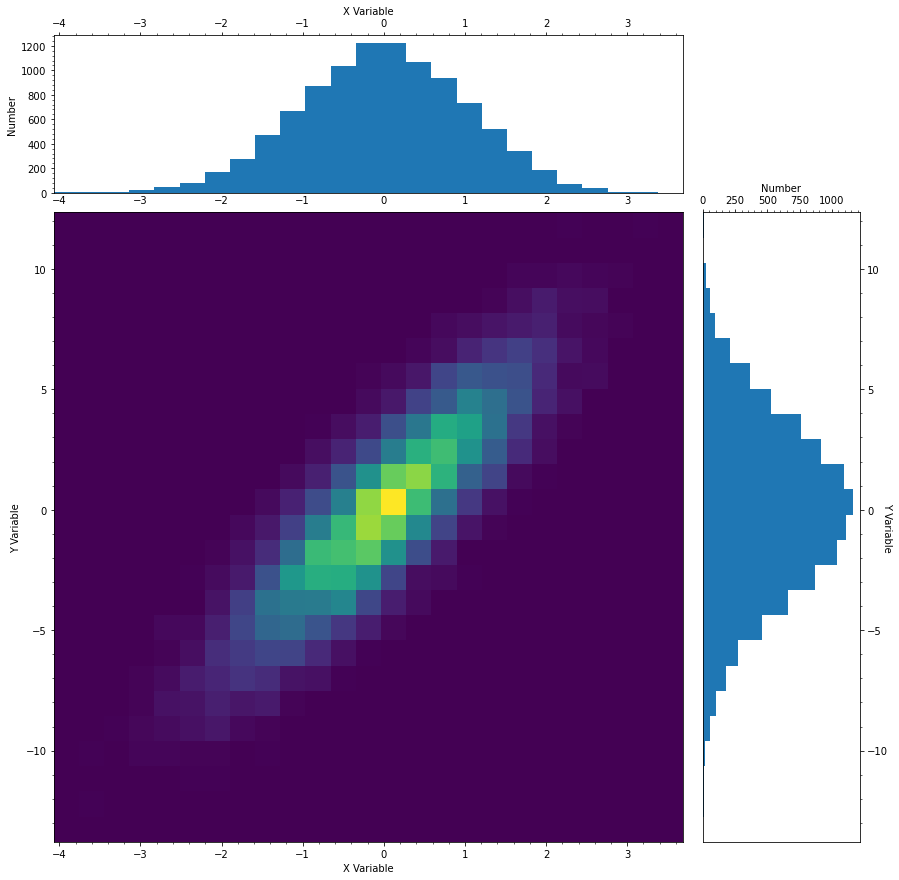

In [30]:
ex3_5()

### Contour Plots

For a parameter Z which is a function of coordindates x and y (Z = f(x,y)), a contour plot represents a 3-dimensional surface by plotting constant z values (i.e. called contours) on a 2-dimensional format (x and y).  Common uses for contour plots include a distribution of chi-squared values as a function of two variables or intensity contours for images.  

The main matplotlib function for contour plots is, naturally, _**plt.contour()**_, or _**plt.contourf()**_ for a _filled_ contour. The API for the main contour plot function is here: [https://matplotlib.org/stable/api/_as\_gen/matplotlib.pyplot.contour.html]().   The API for the filled contour plot is here: [https://matplotlib.org/stable/api/_as\_gen/matplotlib.pyplot.contourf.html]().  

The official _matplotlib_ documentation and a lot of easily accessible examples show contour plots that are pretty simple (just f(x,y) = sqrt(x^2+y^2)) and not so representative of how you would actually use this function.   Here's a more complex version from the _Scientific Computing With Python_ book.

In [40]:
##(Ex_3.6)

def ex3_6():

#From Scientific Computing With Python

 #import matplotlib.pyplot as plt
 #import numpy as np
 #from matplotlib.ticker import AutoMinorLocator

 rosenbrockfunction= lambda x,y: (1-x)**2+100*(y-x**2)**2
 X,Y=np.meshgrid(np.linspace(-0.5,2,100),np.linspace(-1,4,100))
 Z=rosenbrockfunction(X,Y)
 
 sscale=2
 fig,axes=plt.subplots(figsize=(7*sscale,7*sscale))

 axes.set_xlabel('X Variable')
 axes.set_ylabel('Y Variable')
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))

 contour=axes.contour(X,Y,Z,np.logspace(-0.5,3.5,20,base=10),cmap='rainbow')
 axes.clabel(contour,contour.levels[1:],inline=True,fontsize=10,colors='black')


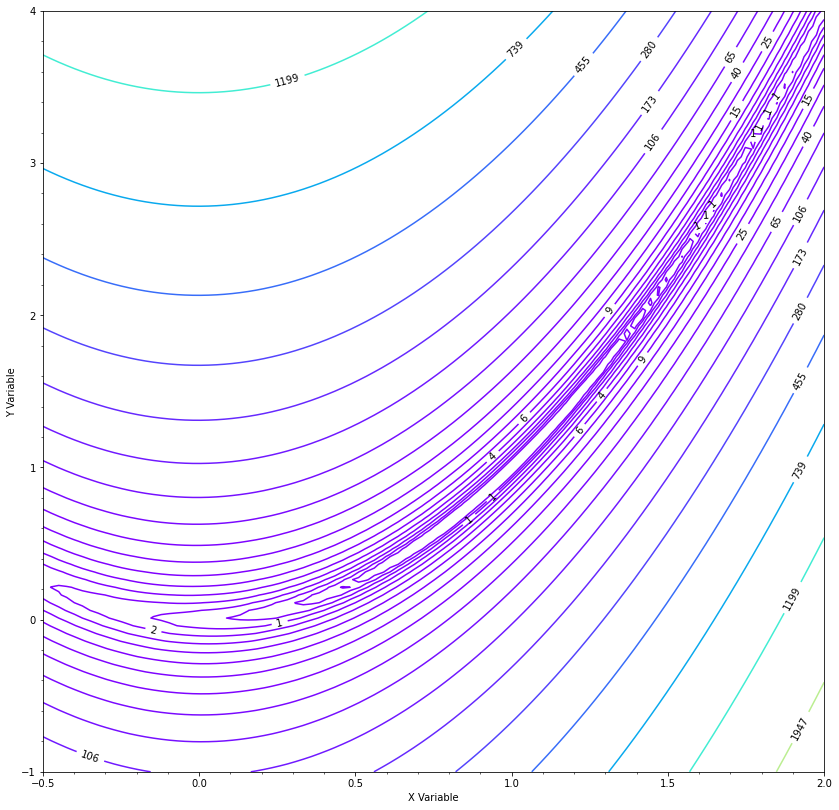

In [41]:
ex3_6()

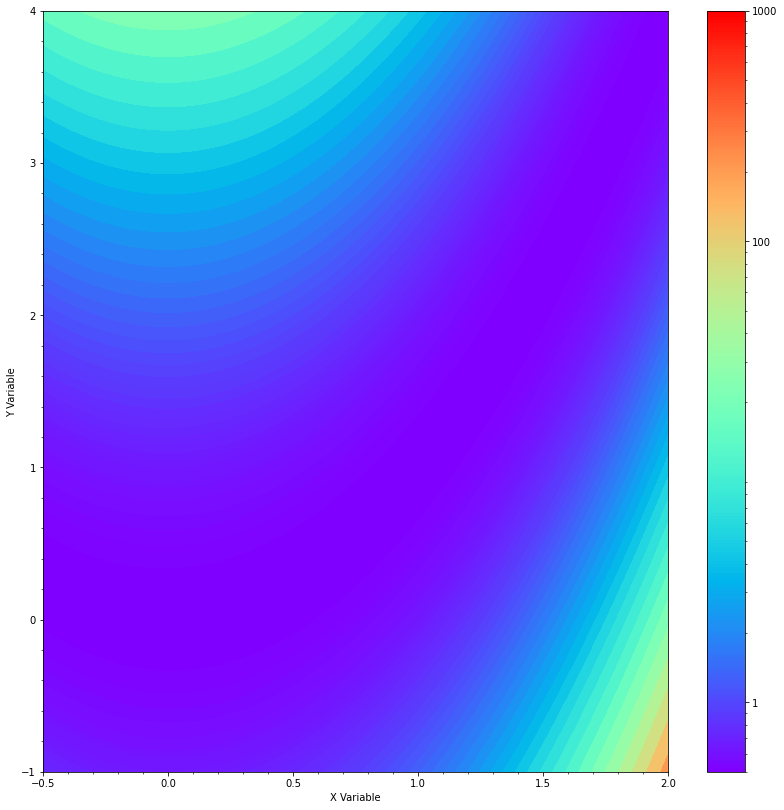

In [43]:
#From Scientific Computing With Python

#now we go back to without a def call
 #import matplotlib.pyplot as plt
 #import numpy as np
 #from matplotlib.ticker import AutoMinorLocator
from matplotlib import colors

rosenbrockfunction= lambda x,y: (1-x)**2+100*(y-x**2)**2+0.5 #added tiny bit to make sure colors displayed
X,Y=np.meshgrid(np.linspace(-.5,2,100),np.linspace(-1,4,100))
 #X,Y=np.meshgrid(np.linspace(-0.5,2,100),np.linspace(-1,4,100))
Z=rosenbrockfunction(X,Y)

fig,axes=plt.subplots(figsize=(7*sscale,7*sscale))

axes.set_xlabel('X Variable')
axes.set_ylabel('Y Variable')
axes.xaxis.set_minor_locator(AutoMinorLocator(5))
axes.yaxis.set_minor_locator(AutoMinorLocator(5))

contour=axes.contourf(X,Y,Z,np.logspace(-0.5,3.5,100,base=10),cmap='rainbow')
 #axes.clabel(contour,contour.levels[1:],inline=True,fontsize=10,colors='black')

norm=colors.LogNorm(contour.cvalues.min(),contour.cvalues.max())
sm=plt.cm.ScalarMappable(cmap='rainbow',norm=norm)
sm.set_clim(vmin=0.5,vmax=1000)
 #sm.set_array([])
fig.colorbar(sm,ticks=(1,100,1000),cmap='rainbow',format='%d')


**Major Caveat** - The above code pieces and usage of contour plots assumes that you have data on a **regularly-spaced grid**: i.e. a grid of x and y, where the separation between neighboring grid points is constant and where there are values f(x,y) at every point.   This is not always the case: in fact, in many cases, you have _irregularly-spaced_ x and y points (e.g. a grid of chi^2 values for some fit to a star's spectrum for different temperatures and gravities).

When you have _irregularly-spaced_ grid points, you need to use a different function: ``axes.tricontour`` and ``axes.tricontourf``.   These functions draw contour lines on an unstructured triangular grid.  To make the contour plots appear correctly, you need a triangulation function: e.g. ``matplotlib.tri.Triangulation(x,y)`` (i.e. create a triangular grid for the exiting (irregularly-spaced) grid).  

An example:

```
import matplotlib as mpl
contour_plot_irregular=axes.tricontour(mpl.tri.Triangulation(x,y),z,
   levels=levels,linewidths=linewidths, colors=colors)
```


, where levels, linewidths, and colors are set before in the code, x and y are the irregular grid points, and z is the value z=f(x,y).

The APIs for the relevant functions are here:

[https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.tricontour.html]()
[https://matplotlib.org/stable/api/_as\_gen/matplotlib.axes.Axes.tricontour.html]()
[https://matplotlib.org/stable/api/tri_api.html#matplotlib.tri.Triangulation]()

### Images

Displaying images and then overplotting or manipulating them in various ways is another key capability of _matplotlib_.   The examples given in most _matplotlib_ documentation are a bit too simple to be useful for us.  But this capability is critical for astronomy/astrophysics: now, I would say 80+% of the figures displaying images in my papers are derived from _matplotlib_ code.  To go from some FITS image (if you don't know the term, you will soon) to a nice polished Python _matplotlib_-produced figure also usually involves the _**astropy**_ package to read in the data as an array _matplotlib_ can handle. We will get to that later (use Google if you want to jump ahead).  For now, assume the commands calling _astropy_ functions are correct.

The key command for image display is _**plt.imshow()**_ (or _**axes.imshow()**_ for the axes container).   Important keywords for _imshow_ include:

-  _origin_ (e.g. ``axes.imshow(image,origin='lower')).  By default, the origin is at the top (origin ='upper'): images displayed appear upside-down compared to how they appear elsewhere (e.g. with DS9).  I always set origin='lower'.
-  _cmap_ - which colormap do you use? See possibilities within _matplotlib_ here: [https://matplotlib.org/stable/tutorials/colors/colormaps.html]()
-  _clim_ - what are the z value limits (i.e. for an image, this is the pixel intensity/count value) -- minimum and maximum?  (cmin,cmax).  E.g. ``axes.imshow(image,clim=(1,100))`` for a color stretch going from a minimum of 1 and maximum of 100.
-  _norm_ - if you do nothing, the image stretch is linear, but you can do other stretches.  E.g. for a logarithimic color scale do ``axes.imshow(image,norm=LogNorm())``

Now, normally, when you use _imshow_ the x and y coordinates listed are pixel coordinates.  You can change this by reading in the World Coordinate System information from your FITS header (wcs=WCS(header)), re-defining the _projection_ in the ``plt.subplots()`` call, and then setting the subplot keyword dictionary to include `projection` = wcs.  E.g. ``fig,axes=plt.subplots(subplot_kw={'projection':wcs})``.  

Below is a simple example to read in a Hubble Space Telescope image of AB Aurigae:

In [48]:
#ex_3_8

def ex3_8():
 from matplotlib.colors import LogNorm

 from astropy.io import fits
 from astropy.wcs import WCS

 hst_stis=fits.open('./code/sect3/files/stisabaurcomball.fits')[0]
 image=hst_stis.data

 wcs=WCS(hst_stis.header)

 imdim=image.shape
 center=np.array(imdim)//2

# x,y=np.meshgrid(imdim,imdim) #not needed

 #fig,axes=plt.subplots(figsize=(10,8)) #x and y coordinates
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(10,8))


 windowsize=75
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 axes.tick_params(which='both',width='1.5',labelsize='large')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.xaxis.set_ticks_position('both')
 axes.yaxis.set_ticks_position('both')
 axes.set_xlabel('Right Ascension',fontsize=16)
 axes.set_ylabel('Declination',fontsize=16)

 axes.imshow(image,origin='lower',norm=LogNorm(),clim=(.5,1000),cmap='jet')




a string value was expected. [astropy.wcs.wcs]


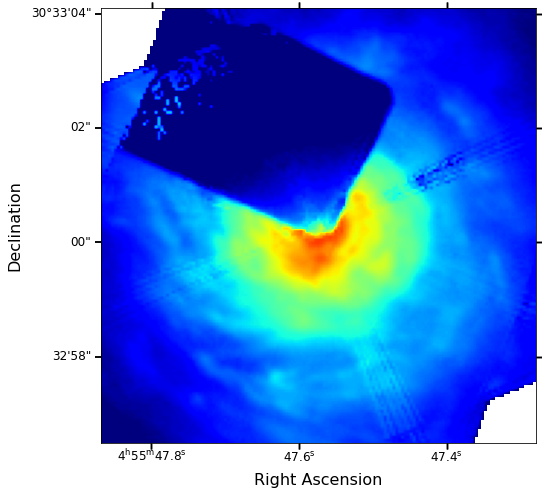

In [49]:
ex3_8()

And here is an example where we overplot a contour plot and add a title and colorbar to the HST image:

In [56]:
def ex3_9():

 from matplotlib.colors import LogNorm

 from astropy.io import fits
 from astropy.wcs import WCS
 hst_stis=fits.open('./code/sect3/files/stisabaurcomball.fits')[0]
 image=hst_stis.data

 wcs=WCS(hst_stis.header)

 imdim=image.shape
 center=np.array(imdim)//2
 print(center)

# x,y=np.meshgrid(imdim,imdim)
# print('x is',x)

 #fig,axes=plt.subplots(figsize=(10,8)) #x and y coordinates
 fig,axes=plt.subplots(subplot_kw={'projection':wcs},figsize=(15,12))


 windowsize=75
 axes.set_ylim(center[0]-windowsize,center[0]+windowsize)
 axes.set_xlim(center[1]-windowsize,center[1]+windowsize)
 axes.xaxis.set_minor_locator(AutoMinorLocator(5))
 axes.yaxis.set_minor_locator(AutoMinorLocator(5))
 axes.tick_params(which='both',width='1.5',labelsize='large')
 axes.tick_params(which='major',length=6)
 axes.tick_params(which='minor',length=3)
 axes.xaxis.set_ticks_position('both')
 axes.yaxis.set_ticks_position('both')
 axes.set_xlabel('Right Ascension',fontsize=16)
 axes.set_ylabel('Declination',fontsize=16)

 axes.imshow(image,origin='lower',norm=LogNorm(),clim=(.5,1000),cmap='jet')

 levels=np.logspace(np.log10(1),np.log10(1000),10)
 imagecontour=axes.contour(image,levels,linestyles='-',colors='white')

 axes.clabel(imagecontour,imagecontour.levels,inline=True,fontsize=11,colors='black')


 norm=LogNorm(levels.min(),levels.max())
 sm=plt.cm.ScalarMappable(cmap='jet',norm=norm)
 sm.set_clim(vmin=0.5,vmax=1000)
 sm.set_array([])
 fig.colorbar(sm,ticks=(levels[0],100,1000),cmap='jet',format='%d')

 axes.set_title('AB Aurigae, with Contours',fontsize=16,fontweight='bold',pad=15)

a string value was expected. [astropy.wcs.wcs]


[201 201]


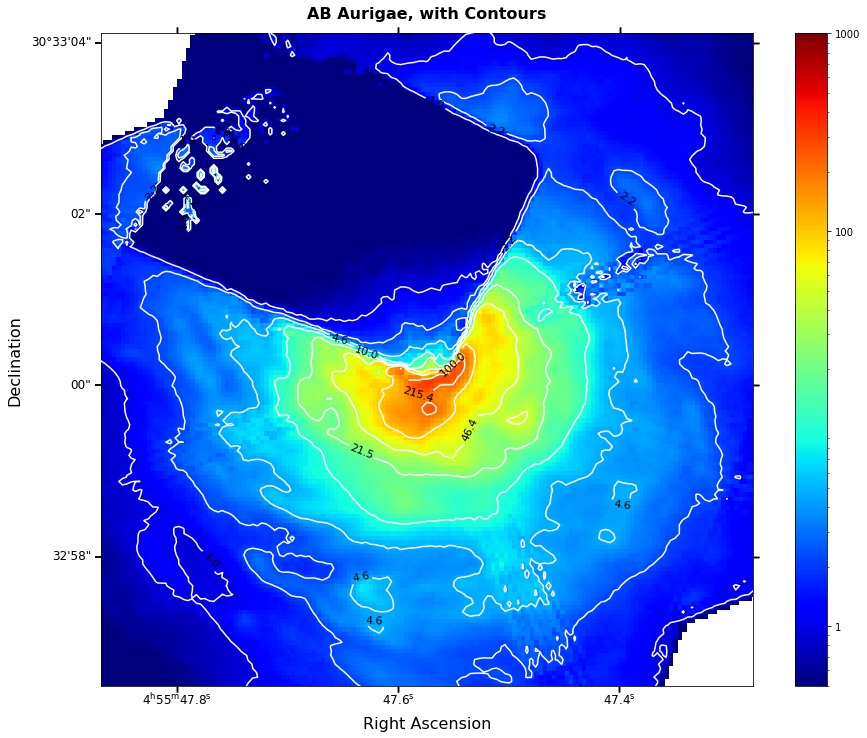

In [57]:
ex3_9()